# Obesity classification

## 1. About Dataset

This dataset helps estimate obesity levels based on eating habits, family history and physical condition. It includes data from individuals in Mexico, Peru, and Colombia, covering 16 lifestyle and health-related features with 2111 records. The labels classify obesity levels, ranging from underweight to different obesity types.

Most of the data was generated using synthetic techniques, while some were collected directly from users through a web platform. \
Inspiration:
Understanding lifestyle factors that contribute to obesity can help with early intervention, health recommendations, and machine learning applications in healthcare.

*Column Descriptions*:\
**Gender** – Male or Female.\
**Age** – The person’s age in years.\
**Height** – Height in meters.\
**Weight** – Weight in kilograms.\
**family_history_with_overweight** – Whether the person has a family history of being overweight (yes/no).\
**FAVC** – If the person frequently consumes high-calorie foods (yes/no).\
**FCVC** – Frequency of vegetable consumption (scale from 1 to 3).\
**NCP** – Number of main meals per day.\
**CAEC** – Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).\
**SMOKE** – Whether the person smokes (yes/no).\
**CH2O** – Daily water intake (scale from 1 to 3).\
**SCC** – If the person monitors their calorie intake (yes/no).\
**FAF** – Physical activity frequency (scale from 0 to 3).\
**TUE** – Time spent using technology (scale from 0 to 3).\
**CALC** – Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).\
**MTRANS** – Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking).\
**NObeyesdad** – Obesity level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III).

## 2. Loading and initial analysis of data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [12]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [14]:
data = data.rename(columns={'NObeyesdad': 'target'})
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,target
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 3. EDA

### 3.2 Analysis of target

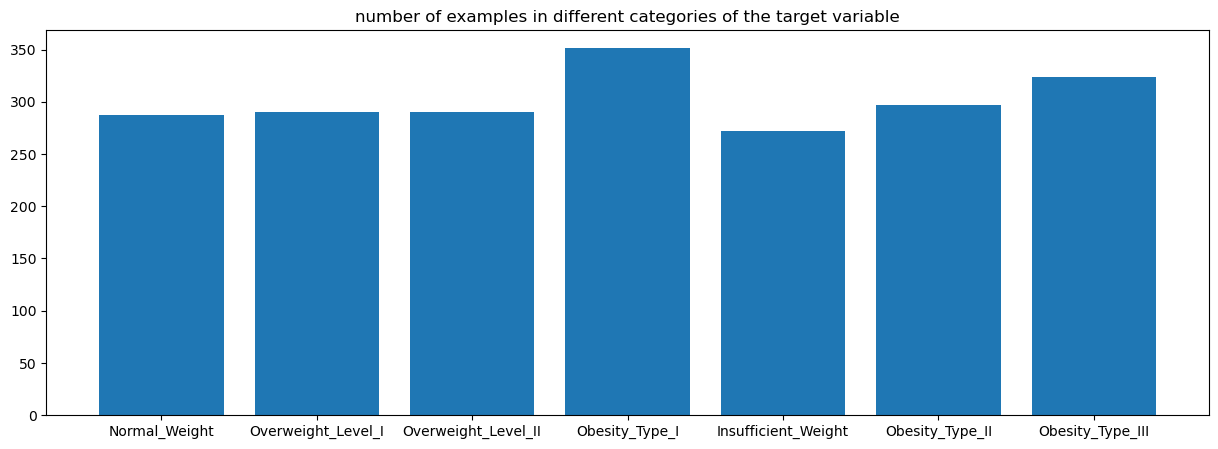

In [18]:
targets = []
for target in data['target'].unique():
    targets.append(len(data.loc[data['target'] == target]))

plt.figure(figsize=(15, 5))
plt.title('number of examples in different categories of the target variable')
plt.bar(data['target'].unique(), targets)
plt.show()

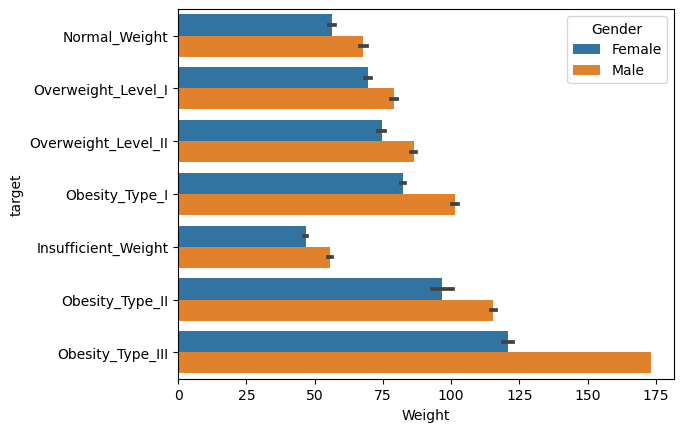

In [20]:
sns.barplot(x=data['Weight'], y=data['target'], hue=data['Gender'])
plt.show()

### 3.2 Analysis of numerical data

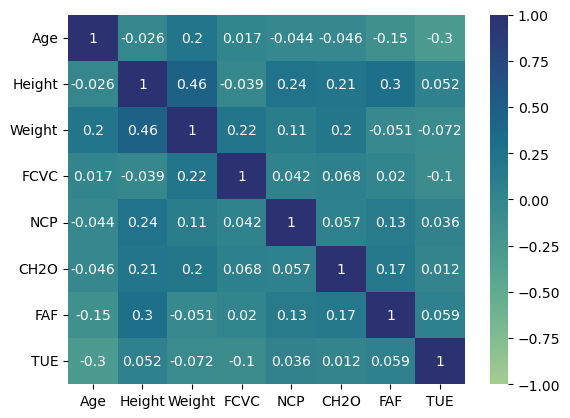

In [23]:
numerical_data = data[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].corr()
sns.heatmap(numerical_data, annot=True, cmap='crest', vmin=-1, vmax=1)
plt.show()

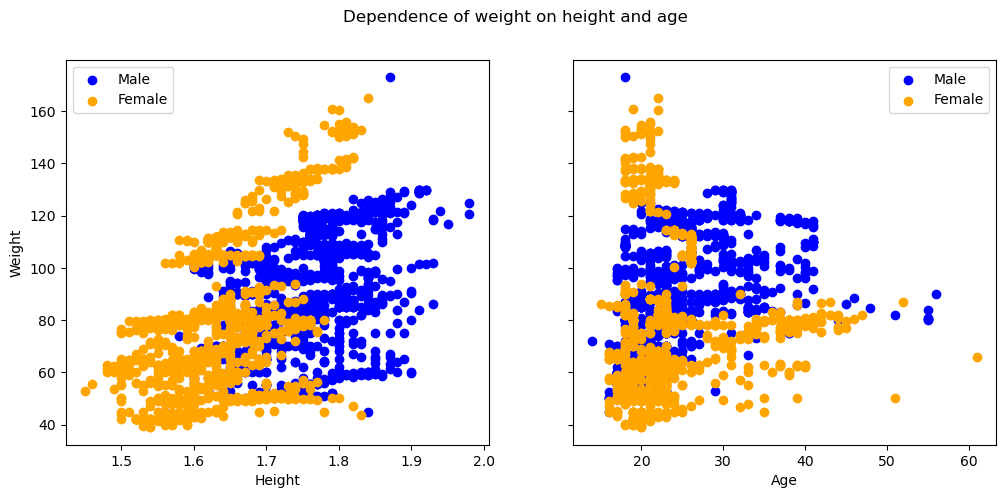

In [25]:
data_male = data.loc[data['Gender'] == 'Male']
data_female = data.loc[data['Gender'] == 'Female']

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.suptitle('Dependence of weight on height and age')

axs[0].scatter(data_male.Height, data_male.Weight, c='b', label="Male")
axs[0].scatter(data_female.Height, data_female.Weight, color='orange', label="Female")
axs[0].legend()
axs[0].set_ylabel("Weight")
axs[0].set_xlabel("Height")

axs[1].scatter(data_male.Age, data_male.Weight, c='b', label="Male")
axs[1].scatter(data_female.Age, data_female.Weight, color='orange', label="Female")
axs[1].legend()
axs[1].set_xlabel("Age")

plt.show()

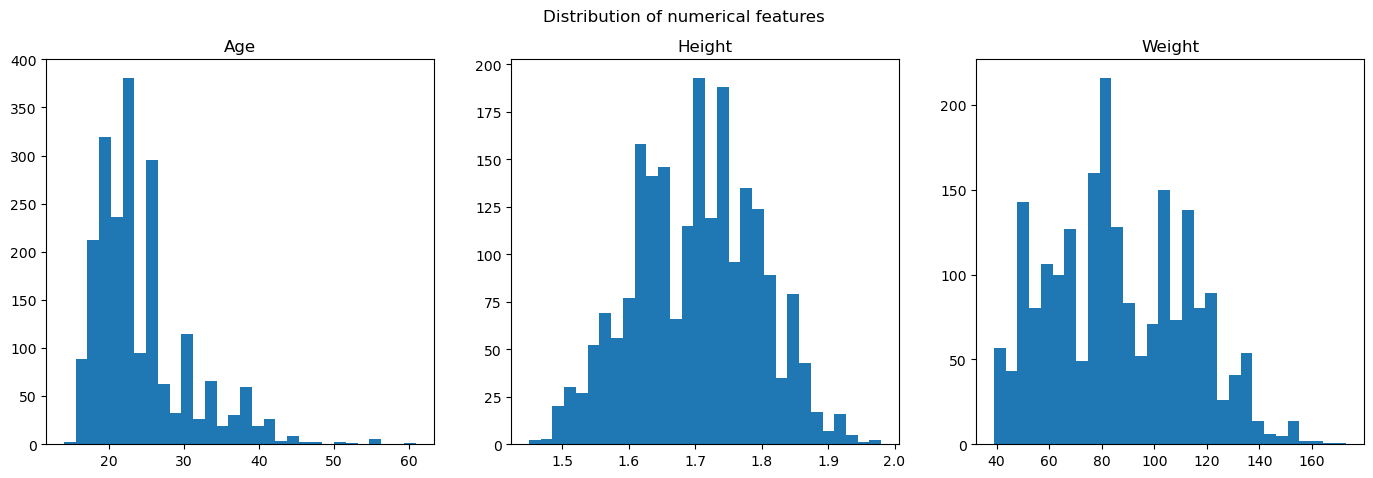

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(17, 5))
plt.suptitle("Distribution of numerical features")

axs[0].hist(data.Age, bins=30)
axs[0].set_title("Age")

axs[1].hist(data.Height, bins=30)
axs[1].set_title("Height")

axs[2].hist(data.Weight, bins=30)
axs[2].set_title("Weight")

plt.show()

### 3.3 Analysis of categorical data

[1726, 385]


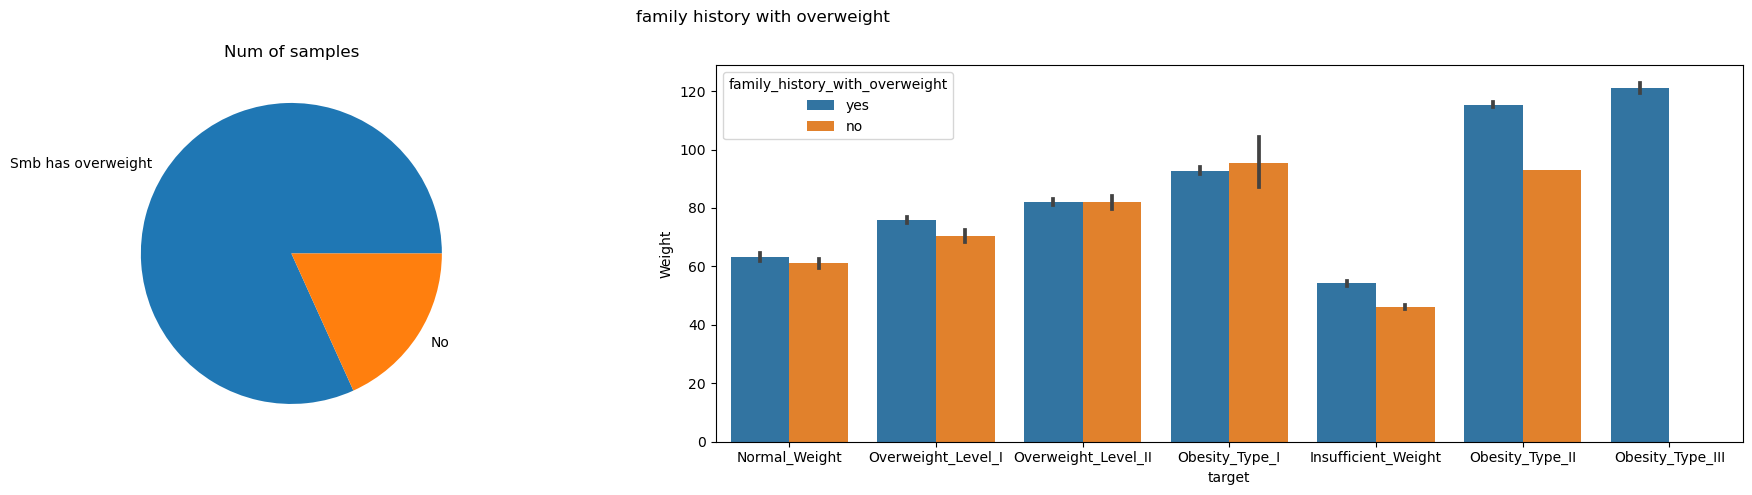

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle("family history with overweight")
data_for_pie = [len(data.loc[data['family_history_with_overweight'] == 'yes'].family_history_with_overweight),
                len(data.loc[data['family_history_with_overweight'] == 'no'].family_history_with_overweight)]

axs[0].pie(data_for_pie, labels=['Smb has overweight', 'No'])
axs[0].set_title("Num of samples")
print(data_for_pie)
sns.barplot(x=data['target'], y=data['Weight'], hue=data['family_history_with_overweight'])

plt.tight_layout()

[1866, 245]


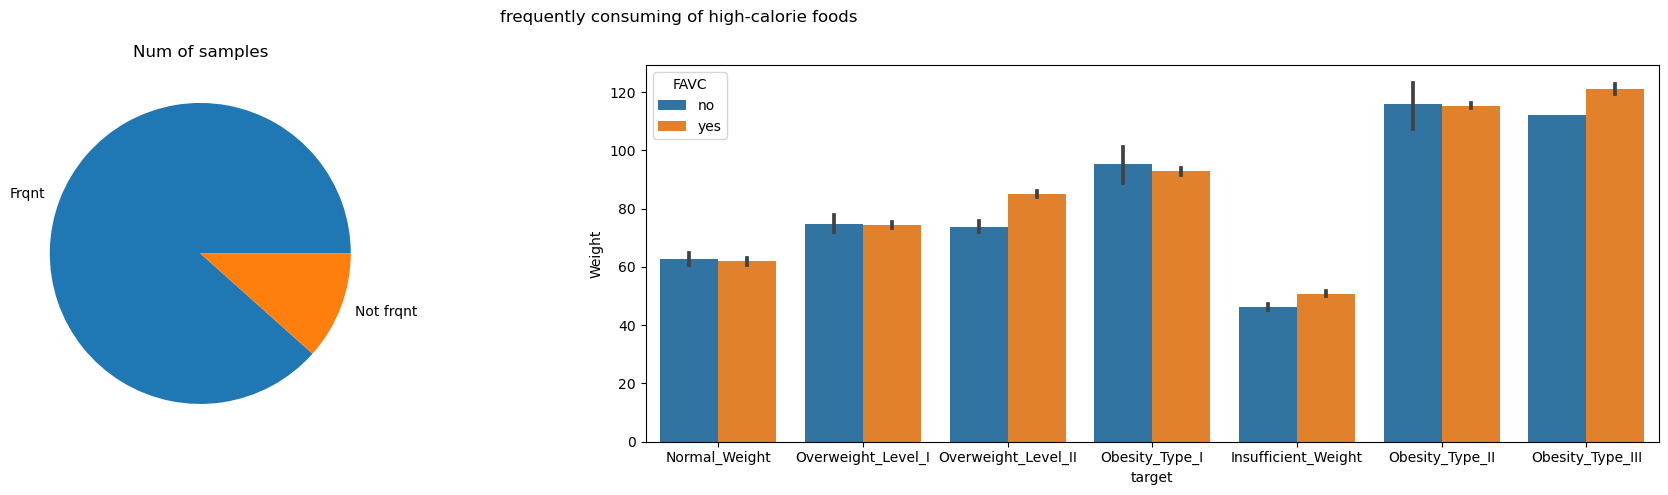

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle("frequently consuming of high-calorie foods")
data_for_pie = [len(data.loc[data['FAVC'] == 'yes'].FAVC),
                len(data.loc[data['FAVC'] == 'no'].FAVC)]

axs[0].pie(data_for_pie, labels=['Frqnt', 'Not frqnt'])
axs[0].set_title("Num of samples")
print(data_for_pie)
d = sns.barplot(x=data['target'], y=data['Weight'], hue=data['FAVC'])
plt.tight_layout()

[44, 2067]


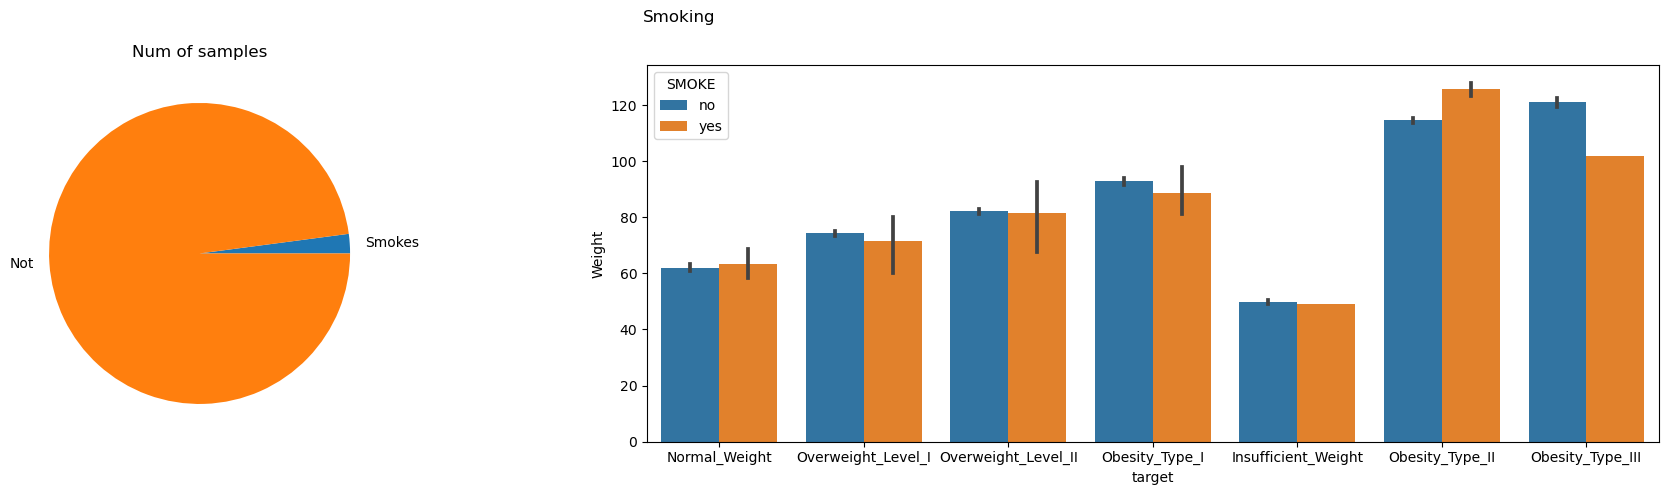

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle("Smoking")
data_for_pie = [len(data.loc[data['SMOKE'] == 'yes'].SMOKE),
                len(data.loc[data['SMOKE'] == 'no'].SMOKE)]

axs[0].pie(data_for_pie, labels=['Smokes', 'Not'])
axs[0].set_title("Num of samples")
print(data_for_pie)
sns.barplot(x=data['target'], y=data['Weight'], hue=data['SMOKE'])
plt.tight_layout()

## 4. Feature-engineering

**Symptoms**

Body mass index, known as BMI, is often used to diagnose obesity. To calculate BMI, multiply weight in pounds by 703, divide by height in inches and then divide again by height in inches. Or divide weight in *kilograms* by height in meters squared. There are several online calculators available that help calculate BMI.

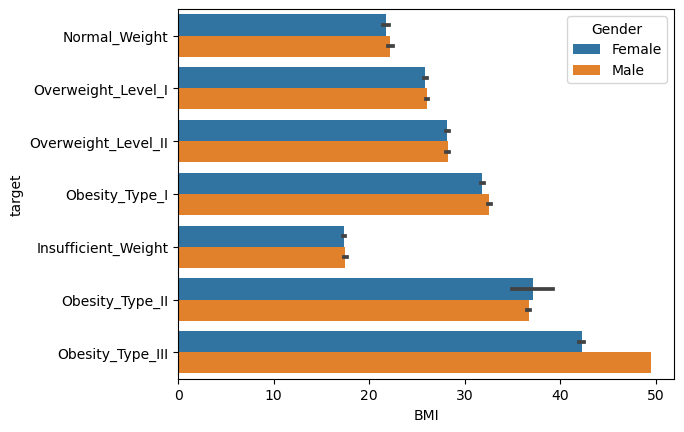

In [38]:
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

sns.barplot(x=data['BMI'], y=data['target'], hue=data['Gender'])
plt.show()

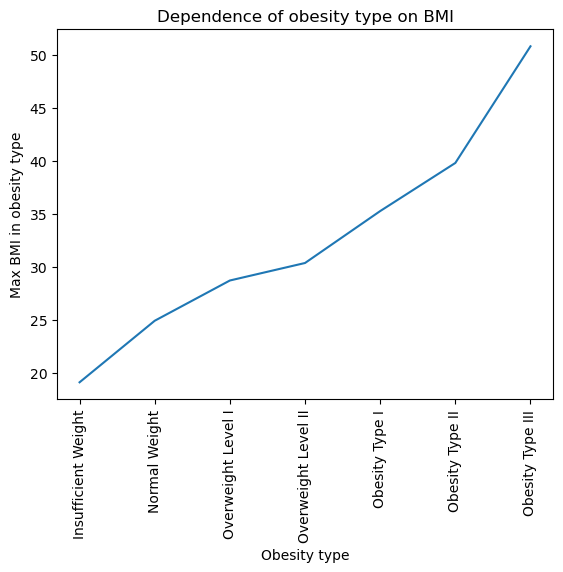

In [40]:
plt.plot(np.arange(7), sorted(data[['BMI', 'target']].groupby(['target']).max().BMI))
plt.title("Dependence of obesity type on BMI")
plt.xlabel("Obesity type")
plt.ylabel("Max BMI in obesity type")
plt.xticks(np.arange(7), ['Insufficient Weight', 'Normal Weight', 'Overweight Level I', 'Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III'], rotation=90)
plt.show()

## 5. Data preprocessing

In [43]:
target = data['target']
del data['target']
target.replace({'Insufficient_Weight': -1, 'Normal_Weight': 0, 'Overweight_Level_I': 1, 'Overweight_Level_II': 2, 'Obesity_Type_I': 3,
                'Obesity_Type_II': 4, 'Obesity_Type_III': 5})

0       0
1       0
2       0
3       1
4       2
       ..
2106    5
2107    5
2108    5
2109    5
2110    5
Name: target, Length: 2111, dtype: int64

In [45]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
genders = pd.DataFrame(encoder.fit_transform(data[['Gender']]), index=data.index, columns=encoder.get_feature_names_out(['Gender']))

del genders['Gender_Female']
genders

,Gender_Male
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
2106,0.0
2107,0.0
2108,0.0
2109,0.0


In [47]:
data['Gender'] = genders['Gender_Male']
data.rename(columns={'Gender': 'Male'})
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0.0,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,24.386526
1,0.0,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,24.238227
2,1.0,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,23.765432
3,1.0,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,26.851852
4,1.0,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,28.342381


In [49]:
data['family_history_with_overweight'] = data['family_history_with_overweight'].replace({'yes': 1, 'no': 0})
data['FAVC'] = data['FAVC'].replace({'yes': 1, 'no': 0})
data['CAEC'] = data['CAEC'].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
data['SMOKE'] = data['SMOKE'].replace({'yes': 0, 'no': 1})
data['SCC'] = data['SCC'].replace({'yes': 0, 'no': 1})
data['CALC'] = data['CALC'].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0.0,21,1.62,64.0,1,0,2.0,3.0,1,1,2.0,1,0.0,1.0,0,Public_Transportation,24.386526
1,0.0,21,1.52,56.0,1,0,3.0,3.0,1,0,3.0,0,3.0,0.0,1,Public_Transportation,24.238227
2,1.0,23,1.80,77.0,1,0,2.0,3.0,1,1,2.0,1,2.0,1.0,2,Public_Transportation,23.765432
3,1.0,27,1.80,87.0,0,0,3.0,3.0,1,1,2.0,1,2.0,0.0,2,Walking,26.851852
4,1.0,22,1.78,89.8,0,0,2.0,1.0,1,1,2.0,1,0.0,0.0,1,Public_Transportation,28.342381


In [51]:
encoder = OneHotEncoder(sparse=False)
transport = pd.DataFrame(encoder.fit_transform(data[['MTRANS']]), index=data.index, columns=encoder.get_feature_names_out(['MTRANS']))
del transport['MTRANS_Motorbike']
transport

,MTRANS_Automobile,MTRANS_Bike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
2106,0.0,0.0,1.0,0.0
2107,0.0,0.0,1.0,0.0
2108,0.0,0.0,1.0,0.0
2109,0.0,0.0,1.0,0.0


In [53]:
del data['MTRANS']

data = data.join(transport)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,BMI,MTRANS_Automobile,MTRANS_Bike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,21,1.62,64.0,1,0,2.0,3.0,1,1,2.0,1,0.0,1.0,0,24.386526,0.0,0.0,1.0,0.0
1,0.0,21,1.52,56.0,1,0,3.0,3.0,1,0,3.0,0,3.0,0.0,1,24.238227,0.0,0.0,1.0,0.0
2,1.0,23,1.80,77.0,1,0,2.0,3.0,1,1,2.0,1,2.0,1.0,2,23.765432,0.0,0.0,1.0,0.0
3,1.0,27,1.80,87.0,0,0,3.0,3.0,1,1,2.0,1,2.0,0.0,2,26.851852,0.0,0.0,0.0,1.0
4,1.0,22,1.78,89.8,0,0,2.0,1.0,1,1,2.0,1,0.0,0.0,1,28.342381,0.0,0.0,1.0,0.0


## 6. Model fitting and validation

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [57]:
(X_train, X_test,
 y_train, y_test) = train_test_split(data, target, test_size=0.3)

models = [LogisticRegression(), DecisionTreeClassifier(), SVC(), GaussianNB()]
models_names = ['LogisticRegression', 'DecisionTreeClassifier', 'SVC', 'GaussianNB']
score = pd.DataFrame(columns=models_names)

for i in range(len(models)):
    cross_score = cross_val_score(models[i], X_train, y_train, cv=3, scoring='accuracy').T
    score[models_names[i]] = cross_score

score

,LogisticRegression,DecisionTreeClassifier,SVC,GaussianNB
0,0.620690,0.973631,0.711968,0.772819
1,0.638211,0.961382,0.666667,0.790650
2,0.676829,0.953252,0.707317,0.725610


In [60]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


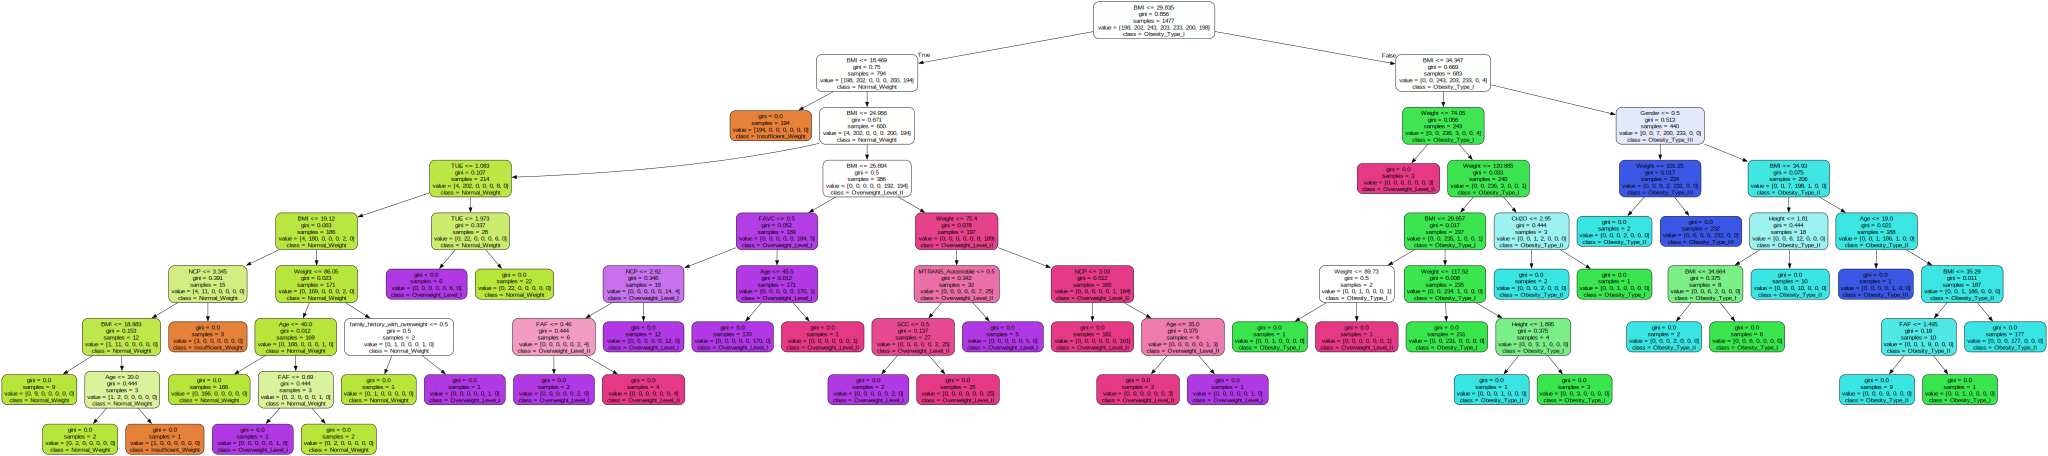

In [62]:
import graphviz
from sklearn import tree

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

dot_data = tree.export_graphviz(model,
                                feature_names=X_test.columns,
                                class_names=model.classes_,
                                filled=True,
                                rounded=True)

graph = graphviz.Source(dot_data)
graph

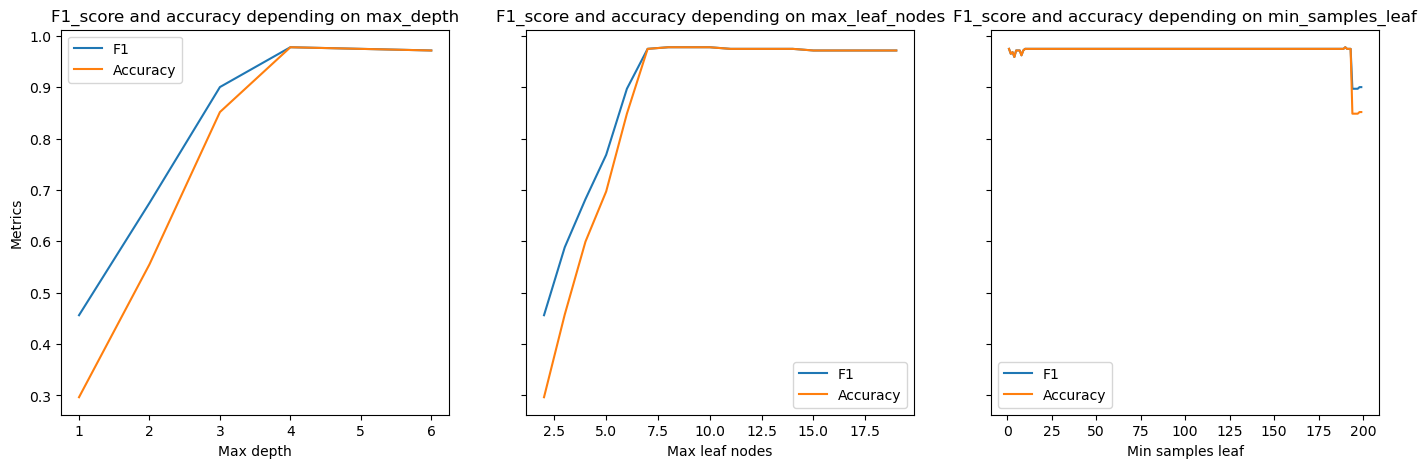

In [64]:
(X_val, X_finaltest,
 y_val, y_finaltest) = train_test_split(X_test, y_test, test_size=0.5)

fig, axs = plt.subplots(1, 3, figsize=(17, 5), sharey=True)

f1 = []
accuracy = []

for i in range(1, 7):
    model = DecisionTreeClassifier(random_state=42, max_depth=i)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    f1.append(f1_score(preds, y_val, average='weighted'))
    accuracy.append(accuracy_score(preds, y_val))

axs[0].plot(np.arange(1, 7), f1, label='F1')
axs[0].plot(np.arange(1, 7), accuracy, label='Accuracy')
axs[0].set_title('F1_score and accuracy depending on max_depth')
axs[0].set_xlabel('Max depth')
axs[0].set_ylabel('Metrics')
axs[0].legend()

f1 = []
accuracy = []

for i in range(2, 20):
    model = DecisionTreeClassifier(random_state=42, max_leaf_nodes=i)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    f1.append(f1_score(preds, y_val, average='weighted'))
    accuracy.append(accuracy_score(preds, y_val))

axs[1].plot(np.arange(2, 20), f1, label='F1')
axs[1].plot(np.arange(2, 20), accuracy, label='Accuracy')
axs[1].set_title('F1_score and accuracy depending on max_leaf_nodes')
axs[1].set_xlabel('Max leaf nodes')
axs[1].legend()

f1 = []
accuracy = []

for i in range(1, 200):
    model = DecisionTreeClassifier(random_state=42, min_samples_leaf=i)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    f1.append(f1_score(preds, y_val, average='weighted'))
    accuracy.append(accuracy_score(preds, y_val))

axs[2].plot(np.arange(1, 200), f1, label='F1')
axs[2].plot(np.arange(1, 200), accuracy, label='Accuracy')
axs[2].set_title('F1_score and accuracy depending on min_samples_leaf')
axs[2].set_xlabel('Min samples leaf')
axs[2].legend()

plt.show()

## 7. Model testing

In [66]:
model = DecisionTreeClassifier(random_state=42, max_depth=4, max_leaf_nodes=7)
model.fit(X_train, y_train)
preds = model.predict(X_finaltest)
print(f"F1 score: {f1_score(preds, y_finaltest, average='weighted')},\nAccuracy: {accuracy_score(preds, y_finaltest)}")

F1 score: 0.9623040613096773,
Accuracy: 0.9621451104100947


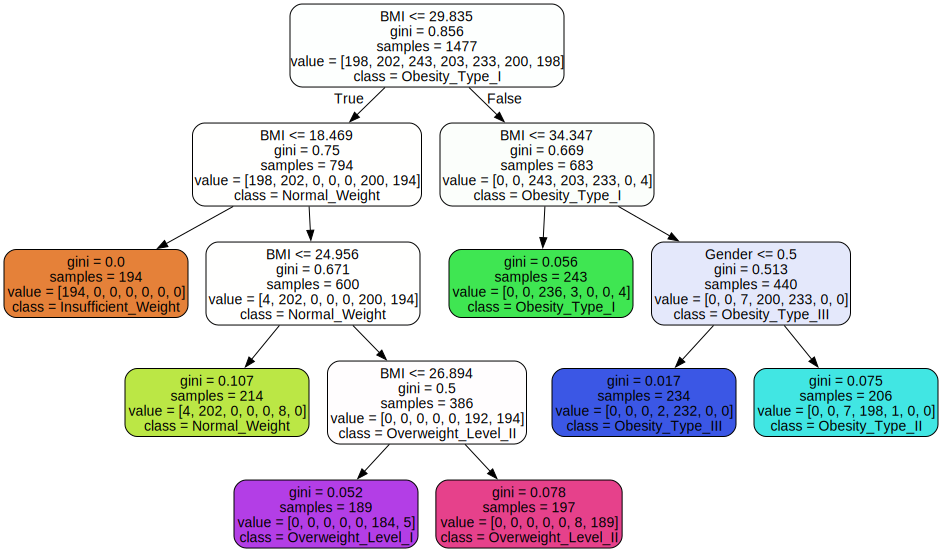

In [69]:
dot_data = tree.export_graphviz(model,
                                feature_names=X_finaltest.columns,
                                class_names=model.classes_,
                                filled=True,
                                rounded=True)

graph = graphviz.Source(dot_data)
graph

## Conclusion
The decision tree graph shows that the main indicator for determining obesity is the constructed feature: body mass index. The obtained metrics allow us to say that a small tree depth is sufficient to accurately diagnose using body mass index.